## Importaciones necesarias

In [155]:
# Para esta actividad se importarán las siguientes librerías:
'''Se importa la librería de pandas para importar la colección de datos'''
import pandas as pd
'''Se importa la librería de LabelEndocer para transformar de categórico a numérico'''
from sklearn.preprocessing import LabelEncoder
'''Se importa la siguiente librería para entrenamiento y prueba de la colección de datos'''
from sklearn.model_selection import train_test_split
'''Se importa la librería SVM para trabajar con el modelo SVM "(Support Vector Machine)"'''
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 

## Cargar el DataSet

In [170]:
df_train = pd.read_csv('kdd_train.csv')
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [100]:
# cargar datos 
df_test = pd.read_csv('kdd_test.csv')
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,5,tcp,smtp,SF,2429,475,0,0,0,0,...,57,0.11,0.02,0.01,0.04,0.0,0.0,0.87,0.0,normal
1,0,udp,domain_u,SF,45,134,0,0,0,0,...,155,0.80,0.02,0.01,0.00,0.0,0.0,0.00,0.0,normal
2,0,udp,domain_u,SF,45,80,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.0,0.0,0.00,0.0,normal
3,1979,udp,other,SF,145,105,0,0,0,0,...,2,0.01,0.84,1.00,0.00,0.0,0.0,0.00,0.0,normal
4,14462,tcp,other,RSTR,1,0,0,0,0,0,...,2,0.01,0.68,1.00,0.00,0.0,0.0,1.00,1.0,portsweep


## Descripción de la fuente del Dataset

Se examinará los conjuntos de entrenamiento y prueba de la NSL-KDD, que proporcionan información significativa sobre los datos de los registros de tráfico de Internet. Estos conjuntos de datos contienen los registros del tráfico de Internet vistos por una simple red de detección de intrusos y se consideran un punto de referencia para el tráfico de Internet actual.
A continuación se visualiza el contenido de los conjuntos de datos:
## Aqui va las características

Vemos que, tanto en los conjuntos de entrenamiento como en los de prueba, hay 42 características por registro, de las cuales 41 se refieren a la entrada de tráfico en sí misma y una característica de etiqueta se refiere al tipo de actividad del registro.

También vemos que parece que hay algunos "grupos" de características distintos y que nos dan algunas pistas sobre cómo podríamos manipular nuestros datos para la construcción del modelo; concretamente:

Características categóricas: Algunas características tienen valores nombrados que identifican algo en la característica, como protocol_type que nos dice que el protocolo está ocurriendo en la observación o flag que identifica qué bandera ocurre durante este registro. Para estas características, lo más probable es que tengamos que codificarlas en un solo paso.
Características de recuento numérico: Características como duración, src_bytes, dst_bytes, etc. parecen ser recuentos enteros de lo que rastrean, respectivamente.

In [101]:
# Obtencion de variables descritas
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,282.850980,4.051230e+04,1.722710e+04,0.000182,0.021822,0.000121,0.196994,0.002370,0.397308,0.276231,...,182.866870,116.787910,0.524935,0.083248,0.147277,0.031895,0.276092,0.270477,0.124323,0.125298
std,2545.220043,5.409528e+06,3.703596e+06,0.013482,0.248406,0.014678,2.087903,0.058437,0.489342,22.490762,...,98.964628,110.868085,0.448749,0.190616,0.308485,0.111598,0.440218,0.441200,0.312011,0.324583
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,84.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,65.000000,0.540000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.760000e+02,5.270000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,54451.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
df_train.count()

duration                       125973
protocol_type                  125973
service                        125973
flag                           125973
src_bytes                      125973
dst_bytes                      125973
land                           125973
wrong_fragment                 125973
urgent                         125973
hot                            125973
num_failed_logins              125973
logged_in                      125973
num_compromised                125973
root_shell                     125973
su_attempted                   125973
num_root                       125973
num_file_creations             125973
num_shells                     125973
num_access_files               125973
num_outbound_cmds              125973
is_host_login                  125973
is_guest_login                 125973
count                          125973
srv_count                      125973
serror_rate                    125973
srv_serror_rate                125973
rerror_rate 

In [103]:
df_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [104]:
df_train.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [147]:
df_train.info()
'''Cuenta el número de valores únicos en la colección de datos, excluyendo el valor nulo'''
df_train.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [106]:
df_test.count()

duration                       22544
protocol_type                  22544
service                        22544
flag                           22544
src_bytes                      22544
dst_bytes                      22544
land                           22544
wrong_fragment                 22544
urgent                         22544
hot                            22544
num_failed_logins              22544
logged_in                      22544
num_compromised                22544
root_shell                     22544
su_attempted                   22544
num_root                       22544
num_file_creations             22544
num_shells                     22544
num_access_files               22544
num_outbound_cmds              22544
is_host_login                  22544
is_guest_login                 22544
count                          22544
srv_count                      22544
serror_rate                    22544
srv_serror_rate                22544
rerror_rate                    22544
s

In [107]:
df_test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [108]:
df_test.isna().count()

duration                       22544
protocol_type                  22544
service                        22544
flag                           22544
src_bytes                      22544
dst_bytes                      22544
land                           22544
wrong_fragment                 22544
urgent                         22544
hot                            22544
num_failed_logins              22544
logged_in                      22544
num_compromised                22544
root_shell                     22544
su_attempted                   22544
num_root                       22544
num_file_creations             22544
num_shells                     22544
num_access_files               22544
num_outbound_cmds              22544
is_host_login                  22544
is_guest_login                 22544
count                          22544
srv_count                      22544
serror_rate                    22544
srv_serror_rate                22544
rerror_rate                    22544
s

In [109]:
df_test.info()
'''Cuenta el número de valores únicos en la colección de datos, excluyendo el valor nulo'''
df_test.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

duration                        704
protocol_type                     3
service                          66
flag                             11
src_bytes                      1517
dst_bytes                      3745
land                              2
wrong_fragment                    3
urgent                            3
hot                              18
num_failed_logins                 6
logged_in                         2
num_compromised                  29
root_shell                        2
su_attempted                      3
num_root                         27
num_file_creations               14
num_shells                        3
num_access_files                  7
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           476
srv_count                       428
serror_rate                      85
srv_serror_rate                  66
rerror_rate                      85
srv_rerror_rate             

Ambos conjuntos poseen sólo cuatro características de objeto/categoría, todas ellas con cantidades relativamente razonables de niveles. En concreto, estas características son la duración, el tipo de protocolo, el servicio y las etiquetas. También observamos dos problemas:

Hay un cierto grado de desajuste en los niveles de las características de servicio y etiquetas entre nuestro conjunto de pruebas. Tendremos que conciliar estas disparidades de alguna manera, especialmente si hacemos una codificación de un solo golpe, para mantener la fidelidad dimensional durante el entrenamiento y la predicción del modelo.
La característica de servicio tiene hasta 70 valores únicos. Este nivel de cardinalidad puede ser problemático, pero decidiremos minimizarlo o no en función del rendimiento de nuestro modelo.
Ambos conjuntos contienen ciertas características enteras con rangos amplios. En concreto, estas características son:
- duración
- src_bytes
- dst_bytes
- caliente
- num_compromiso
- num_root
- count
- srv_count
- dst_host_count
- dst_host_srv_count

### Reducción de características de entrada con PCA

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [111]:
df_train.shape

(125973, 42)

In [112]:
df_test.shape

(22544, 42)

In [166]:
variablesCategoricas = df_train.select_dtypes(include=['object']).columns
variablesCategoricas

Index(['protocol_type', 'service', 'flag', 'labels'], dtype='object')

In [167]:
for col in ['protocol_type','service','flag','labels']:
    df_train[col] = df_train[col].astype('category')

In [168]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     125973 non-null  int64   
 1   protocol_type                125973 non-null  category
 2   service                      125973 non-null  category
 3   flag                         125973 non-null  category
 4   src_bytes                    125973 non-null  int64   
 5   dst_bytes                    125973 non-null  int64   
 6   land                         125973 non-null  int64   
 7   wrong_fragment               125973 non-null  int64   
 8   urgent                       125973 non-null  int64   
 9   hot                          125973 non-null  int64   
 10  num_failed_logins            125973 non-null  int64   
 11  logged_in                    125973 non-null  int64   
 12  num_compromised              125973 non-null

In [171]:
labelencoder=LabelEncoder()
for column in ['protocol_type','service','flag','labels']:
    df_train[column] = labelencoder.fit_transform(df_train[column])
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,11
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11


In [174]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  int32  
 2   service                      125973 non-null  int32  
 3   flag                         125973 non-null  int32  
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

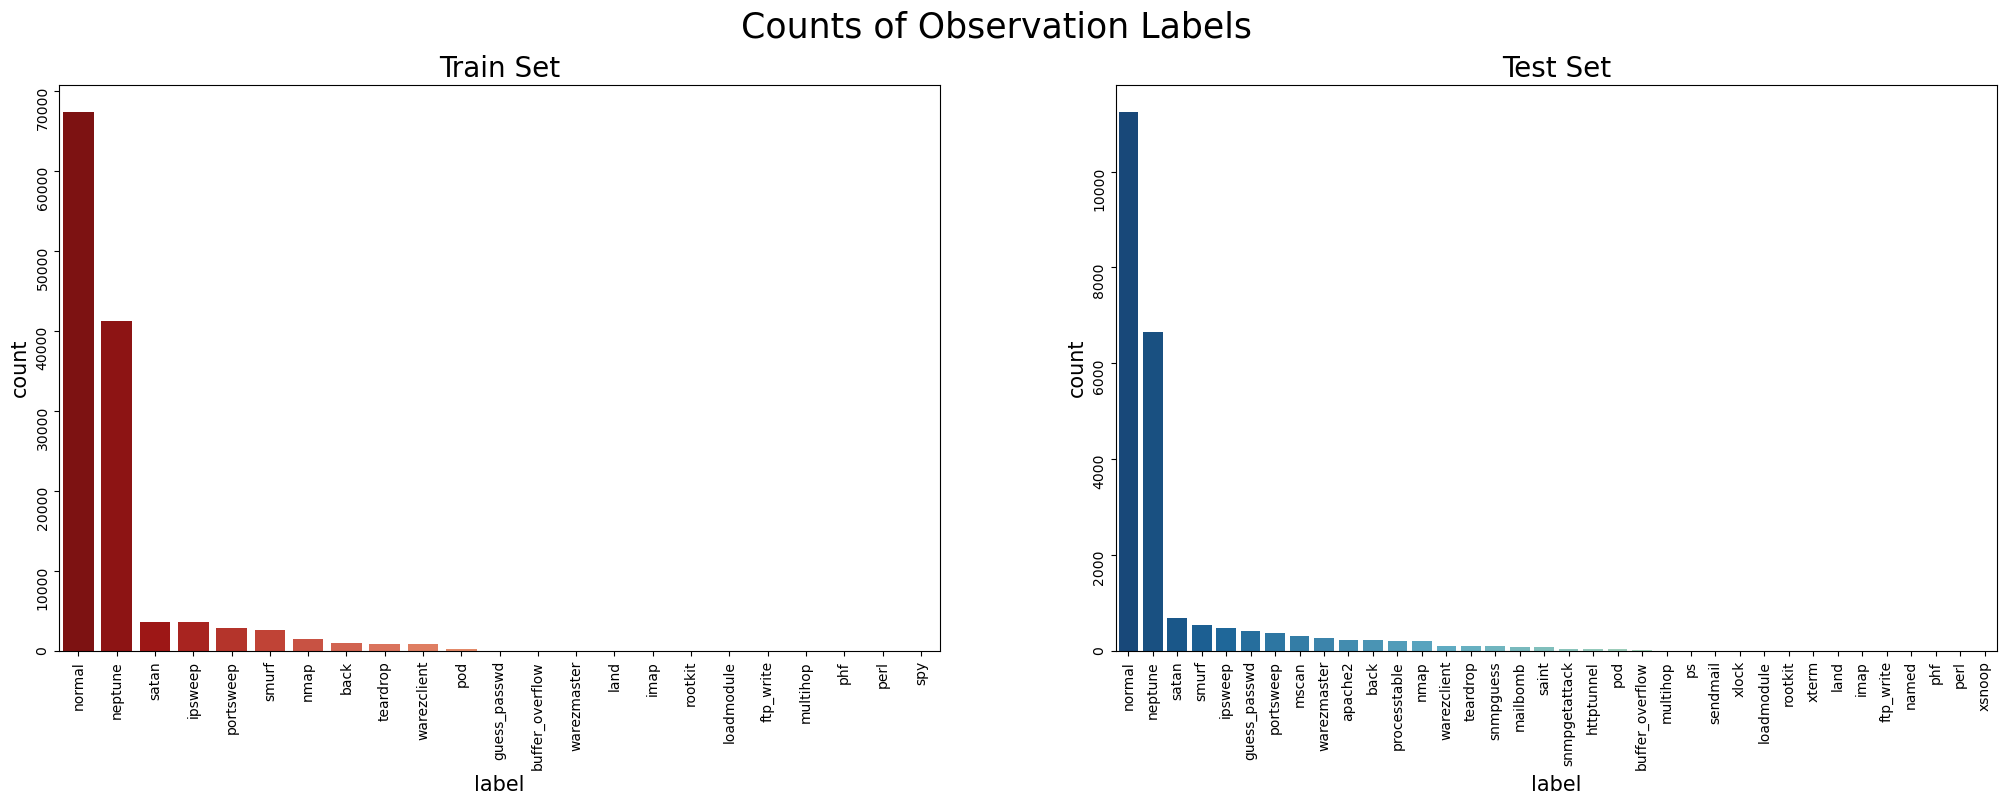

In [142]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(25, 7.5), dpi=100)

fig.suptitle(f'Counts of Observation Labels', fontsize=25)

sns.countplot(x="labels", 
            palette="OrRd_r", 
            data=df_train, 
            order=df_train['labels'].value_counts().index,
            ax=ax1)

ax1.set_title('Train Set', fontsize=20)
ax1.set_xlabel('label', fontsize=15)
ax1.set_ylabel('count', fontsize=15)
ax1.tick_params(labelrotation=90)

sns.countplot(x="labels", 
            palette="GnBu_r", 
            data=df_test, 
            order=df_test['labels'].value_counts().index,
            ax=ax2)

ax2.set_title('Test Set', fontsize=20)
ax2.set_xlabel('label', fontsize=15)
ax2.set_ylabel('count', fontsize=15)
ax2.tick_params(labelrotation=90)

plt.show()

Inmediatamente vemos que tenemos un sesgo significativo en nuestros datos, que son en su mayoría observaciones de comportamiento normal y ataques de neptuno, que es un ataque en el que el atacante explota los defectos en el three-way-handshake del protocolo TCP y envía continuamente un gran número de paquetes SYN falsos sucesivos. Cuando hagamos nuestro preprocesamiento, reduciremos la muestra de estas observaciones para utilizar un número más acorde con el número de otros tipos de ataques en nuestro conjunto de datos.

## Problema a resolver

## Caracterización del Conjunto de datos

## Variables categóricas

## Tratamiento de valores atipicos - Tecnicas de imputación

## Preoprocesamiento del conjunto de datos (transofrmaciones previas necesarias para la modelación)

## División del conjunto de datos de entrenamiento y datos de prueba

# Modelos predictivos

## Naive bayes

### Aplicar

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))